In [14]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt

print(os.getcwd())
hdu = fits.open(os.getcwd() + "/media/large/off/offset001.off.fits")
image = hdu[0].data
print(image.shape)

/home/tteck/Documents/Development/flct_destretch/flctdestretch/examples
(1000, 1000, 2)


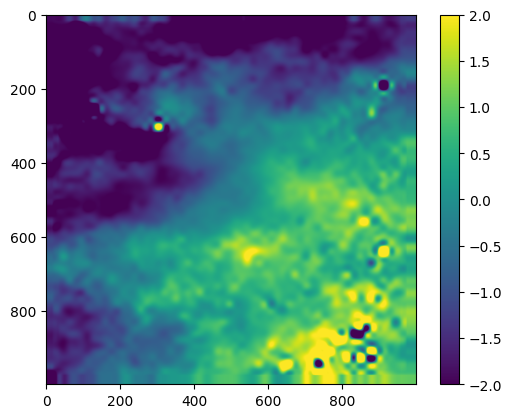

In [19]:
plt.figure
plt.imshow(image[:,:,1],vmin=-2,vmax=2)
plt.colorbar()

In [24]:
import re
import numpy as np

fits_regex = re.compile("^.*\.fits$")
paths = [
        os.path.join(os.getcwd() + "/media/large/off", filename)
        for filename in os.listdir(os.getcwd() + "/media/large/off")
        if fits_regex.match(filename)
    ]


shifts_slice = np.zeros((1000,112,2))
cnt = 0
for path in paths:
    filein = fits.open(path)
    shifts_slice[:,cnt,:] = filein[0].data[:,500,:]
    cnt += 1

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_7807/2184227946.py:4: SyntaxWarning: invalid escape sequence '\.'
  fits_regex = re.compile("^.*\.fits$")


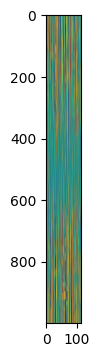

In [30]:
plt.figure(figsize=(16,4))
plt.imshow(shifts_slice[:,:,1],vmin=-1,vmax=1)

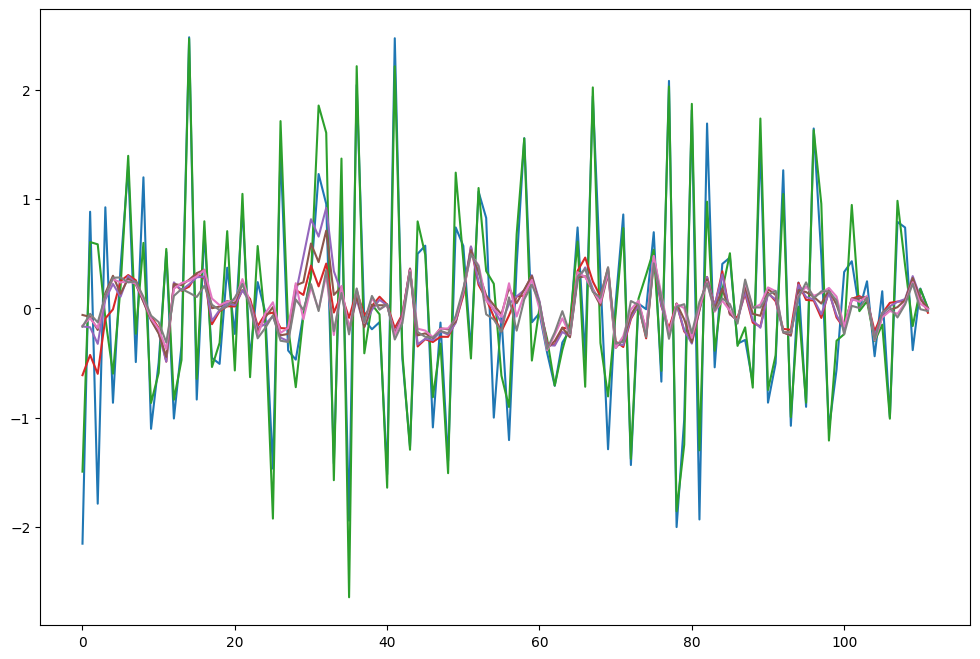

In [46]:
plt.figure(figsize=(12,8))
plt.plot(shifts_slice[100,:,1])
plt.plot(np.mean(shifts_slice[100,:,0]))
plt.plot((shifts_slice[120,:,1]))
plt.plot(np.convolve(shifts_slice[100,:,1], np.ones(5)/5, mode='same'))
plt.plot(np.convolve(shifts_slice[110,:,1], np.ones(5)/5, mode='same'))
plt.plot(np.convolve(shifts_slice[120,:,1], np.ones(5)/5, mode='same'))
plt.plot(np.convolve(shifts_slice[130,:,1], np.ones(5)/5, mode='same'))
plt.plot(np.convolve(shifts_slice[140,:,1], np.ones(5)/5, mode='same'))